<b> MONTE CARLO SIMULATION FOR PROJECT RISK ASSESSMENT </b>

Problem statement

A construction project involves three tasks:

- Task 1 is likely to take three days (70% probability), but it might also be completed in two days (with 10% probability) or four days (20% probability)

- Task 2 has a 60% probability of taking six days to finish, a 20% probability each of being completed in five days or eight days

- Task 3 has an 80% probability of being completed in four days, 5% probability of being completed in three days and a 15% probability of being completed in five days.

Each task is dependent on the task before it, meaning that the three tasks must be executed in sequence. Your task is to provide information to the project manager concerning the expected completion time of the project and possible delays.

Using Monte Carlo simulation method, we will estimate the probability distribution of completion time, providing much more information for decision-making on project risk than only best and worst cases.



After running the simulation 1000 times
The number of occurences of task1 being completed in 2, 3, and 4 days is [106 697 197]


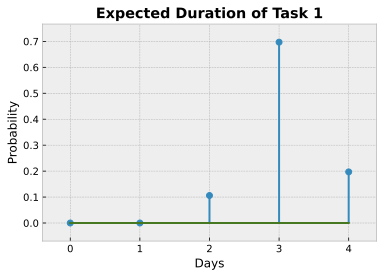

In [1]:
import numpy
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["svg"]


def task1_days():
    u = numpy.random.uniform() #we are selecting random numbers using uniform distribution that will return numbers
                                #from 0 to 1 
    if u < 0.7: return 3 #reflects the 70% probability of finishing in 3 days
    if u < 0.8: return 2 # 0.8 - 0.returns 2 days 
    return 4

N = 1000
sim = numpy.zeros(N, dtype=int) 
for i in range(N): 
    sim[i] = task1_days()  #Running the simulation 1000 times 
print('After running the simulation 1000 times')
print(f'The number of occurences of task1 being completed in 2, 3, and 4 days is {numpy.bincount(sim)[2:]}')
plt.stem(numpy.bincount(sim)/1000, use_line_collection=True) #bincount counts the number of occurrence of each element 
plt.title("Expected Duration of Task 1", weight="bold")
plt.xlabel("Days")
plt.ylabel("Probability")
plt.margins(0.1)

Notice how task1 can be completed in Day 3 with a probability of 0.7

Let's define similar functions for durations of tasks 2 and 3.

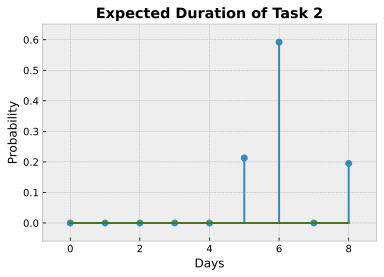

In [2]:
def task2_days():
    u = numpy.random.uniform()
    if u < 0.6: return 6
    if u < 0.8: return 5
    return 8

N = 1000
sim = numpy.zeros(N, dtype=int)
for i in range(N):
    sim[i] = task2_days()
plt.stem(numpy.bincount(sim)/1000, use_line_collection=True)
plt.title("Expected Duration of Task 2", weight="bold")
plt.xlabel("Days")
plt.ylabel("Probability")
plt.margins(0.1)

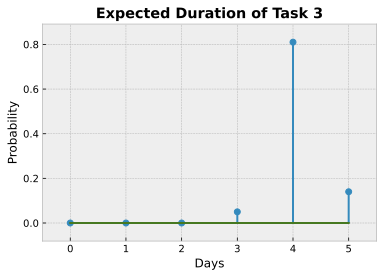

In [3]:
def task3_days():
    u = numpy.random.uniform()
    if u < 0.8: return 4
    if u < 0.85: return 3
    return 5

N = 1000
sim = numpy.zeros(N, dtype=int)
for i in range(N):
    sim[i] = task3_days()
plt.stem(numpy.bincount(sim)/1000, use_line_collection=True)
plt.title("Expected Duration of Task 3", weight="bold")
plt.xlabel("Days")
plt.ylabel("Probability")
plt.margins(0.1)

The total duration of the project is simply the sum of the individual task durations

In [4]:
def project_duration():
    return task1_days() + task2_days() + task3_days()


We can now run a large number of simulations of project execution to estimate the worst case, best case and median durations. 
We can also provide the expected probability distribution of the duration.



Worst case: 17 days
Best case: 11 days
Median: 13.0 days


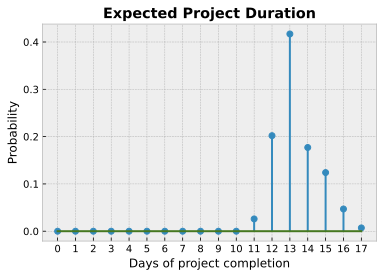

In [5]:
N = 1000
sim = numpy.zeros(N, dtype=int)
for i in range(N):
    sim[i] = project_duration()
plt.stem(numpy.bincount(sim)/1000, use_line_collection=True)
plt.title("Expected Project Duration", weight="bold",)
plt.xlabel("Days of project completion");
plt.ylabel("Probability")
plt.xticks([*range(0,18,1)])
print("Worst case: {} days".format(sim.max()))
print("Best case: {} days".format(sim.min()))
print("Median: {} days".format(numpy.median(sim)))

We can conclude that:
- The project under the worst case scenario can be completed in 17 days with a probability of approx. 0.006

- The project under the best case scenario can be completed in 10 days with a probability of approx 0.005

- The project under a median condition can be completed in 13 days with a probability of approx 0.4


